#**Stock Prize Prediction Using LSTM Model by Chirag Vij**

Explanation:

*   Begin by loading the dataset. Copy the data and paste it into an
    Excel file, then save it as a .csv file.
*   Next, import the dataset into Python.
*   Proceed to extract the closing values of the shares and assign an
    index to each value. Plot a graph based on this data to gain insights into the share prices over time.
*   Normalize the dataset, converting the share values to a range
    between 0 and 1. This will be useful for training and testing the dataset.
*   Train and test the data using the last 25% of the dataset, which
    was set aside for this purpose.
*   Create a stacked LSTM model.
*   Once the model is created, train it using the dataset 100 times to
    achieve more precise predictions and improved accuracy.
*   Finally, plot a graph to visualize the data. Focus on the last 100
    days of stock prices, the next 30 days of stock prices, as well as the continuous curve for the 100+30 day period.







#IMPORT LIBRARIES

In [39]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [40]:
df = pd.read_csv('/content/Stock prize prediction.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN
...,...,...,...,...,...,...,...,...,...
2030,7/27/2010,117.60,119.50,112.00,118.80,118.65,586100,694.98,NaN
2031,7/26/2010,120.10,121.00,117.10,117.10,117.60,658440,780.01,NaN
2032,7/23/2010,121.80,121.95,120.25,120.35,120.65,281312,340.31,NaN
2033,7/22/2010,120.30,122.00,120.25,120.75,120.90,293312,355.17,NaN


In [41]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN


In [42]:
df = df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [43]:
df.isnull().sum()

0

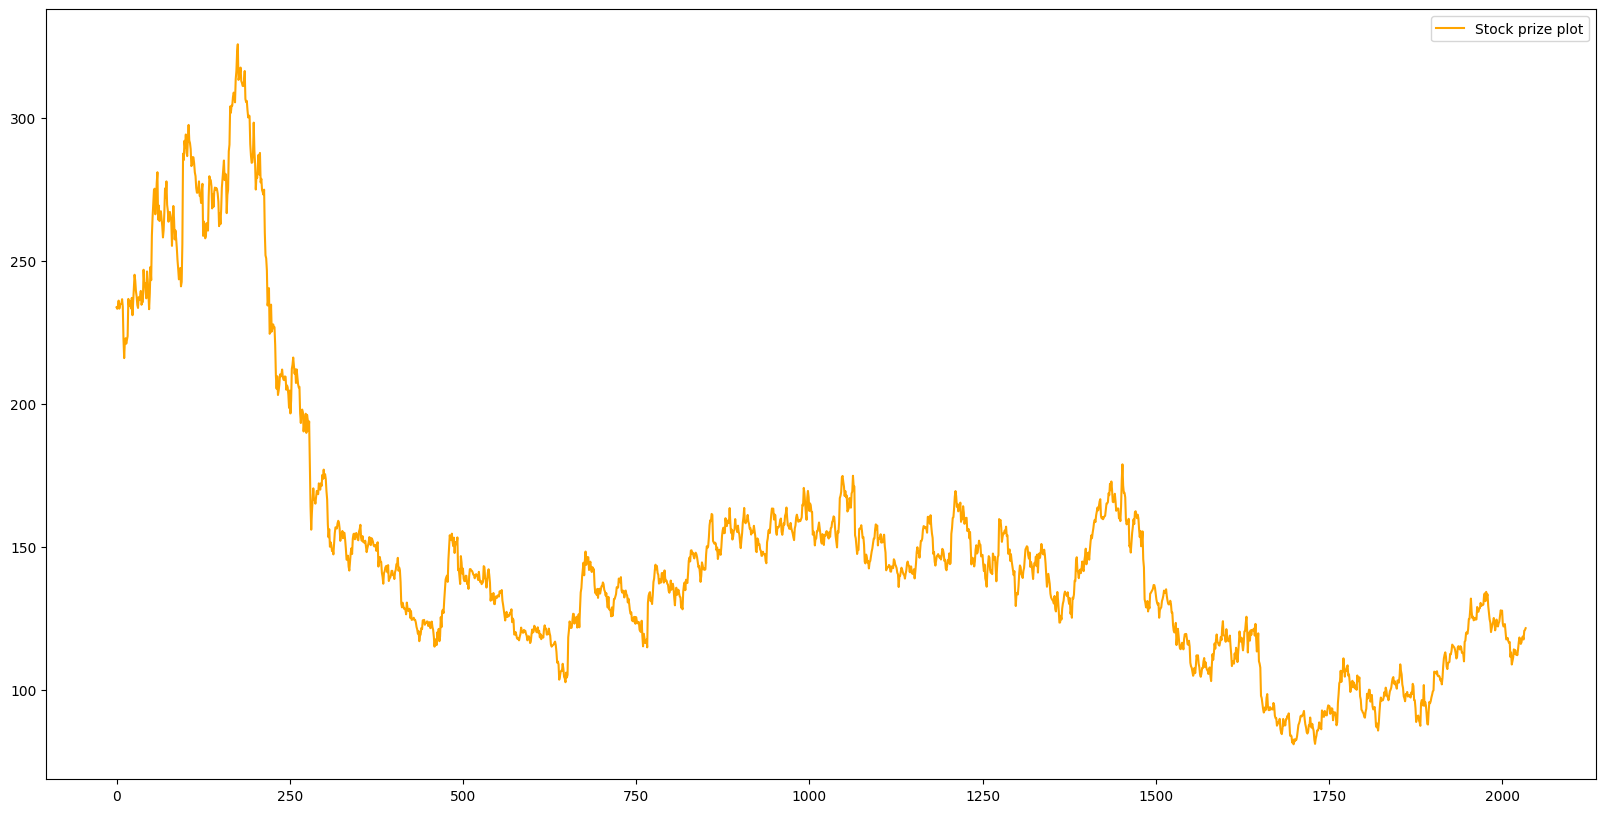

In [44]:
plt.figure(figsize=(20,10))
plt.plot(df,color='orange',label='Stock prize plot')
plt.legend()

#**Preprocessing The Dataset**

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


#**Train and test datasets according to the time step**

In [46]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [47]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [49]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#**LSTM model**

In [50]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.build((None, 100, 1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 14s 229ms/step - loss: 0.0285 - val_loss: 0.0099
Epoch 2/100
23/23 [==============================] - 4s 171ms/step - loss: 0.0035 - val_loss: 8.4239e-04
Epoch 3/100
23/23 [==============================] - 6s 268ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 4s 170ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 4s 174ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 5s 231ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 5s 205ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 4s 171ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 7s 321ms/step - loss: 0.0012 - val_loss: 9.3366e-04
Epoch 10/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0012

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 [==============================] - 1s 38ms/step


In [53]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#**Calculating Root Mean Square Error**

In [54]:
math.sqrt(mean_squared_error(y_train,train_predict))

163.51293545924648

In [55]:
math.sqrt(mean_squared_error(y_test,test_predict))

106.50201472982546

#**Plotting the Graph**

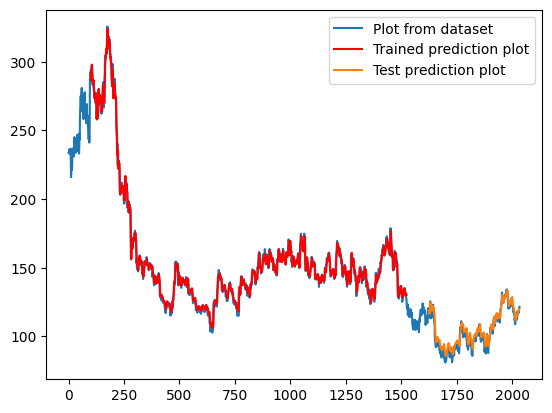

In [56]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df),label='Plot from dataset')
plt.plot(trainPredictPlot,'r',label='Trained prediction plot')

plt.plot(testPredictPlot,label='Test prediction plot')
plt.legend()
plt.show()

In [57]:
len(test_data)

509

In [58]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [60]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.1673264]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df)

2035

#**Graph of last 100 days**

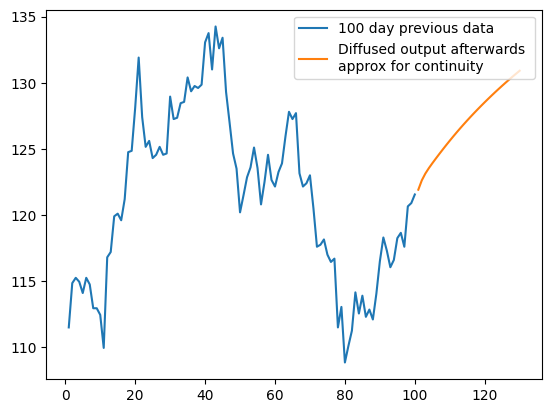

In [62]:
plt.plot(day_new,scaler.inverse_transform(df[1935:]),label='100 day previous data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Diffused output afterwards \napprox for continuity')
plt.legend()

#**Graph for next 30 days**

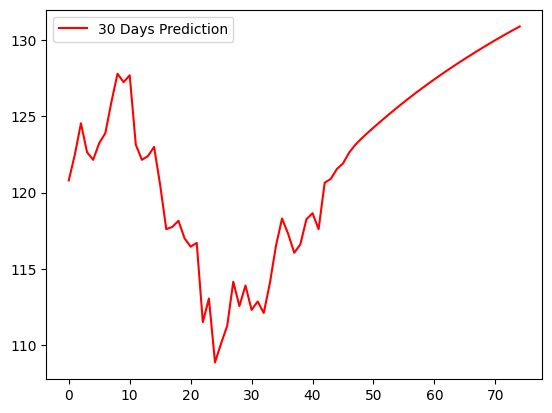

In [63]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='30 Days Prediction')
plt.legend()

#**Graph for 130 Days**

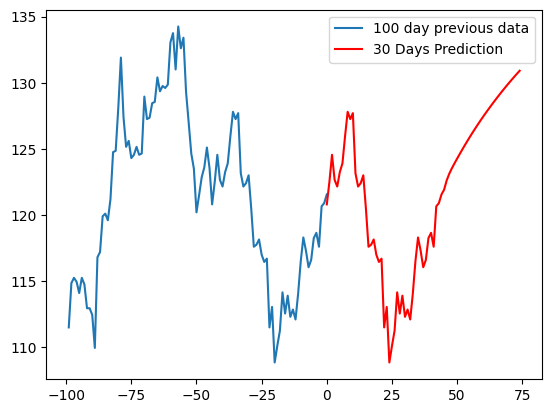

In [64]:
plt.plot(day_new-100,scaler.inverse_transform(df[1935:]),label='100 day previous data')
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='30 Days Prediction')
plt.legend()